In [19]:
# For Table 5 in the paper.
import pandas as pd

# analyze the exp with non_rt_task
result_dir = "../../real_linux_application/exp_results_RTscheduler_21"
schedulers = ["CFS", "FIFO", "RR", "EDF"]

# set task_info in dataset
result_path = result_dir + "/" + schedulers[0] + "_result.json"
results_df = pd.read_json(result_path)
results_df = results_df[["task_name", "deadline_ns", "wcet_ns", "priority", "nice_value"]]
results_df["period_ms"] = results_df["deadline_ns"] / 1000000
results_df["wcet_ms"] = results_df["wcet_ns"] / 1000000
results_df = results_df.drop(["deadline_ns", "wcet_ns"], axis=1)

for scheduler in schedulers:
    result_path = result_dir + "/" + scheduler + "_result.json"
    result_df = pd.read_json(result_path)
    result_df = result_df[["task_name", "wcrt_ns", "avg_response_time_ns"]]
    result_df.columns = ["task_name", scheduler + "_wcrt_ns", scheduler + "_avg_rt_ns"]
    result_df[scheduler + "_wcrt_ms"] = result_df[scheduler + "_wcrt_ns"] / 1000000
    result_df[scheduler + "_avg_rt_ms"] = result_df[scheduler + "_avg_rt_ns"] / 1000000
    result_df = result_df.drop([scheduler + "_wcrt_ns", scheduler + "_avg_rt_ns"], axis=1)
    results_df = pd.merge(results_df, result_df, on="task_name")

results_df = results_df[["task_name", "period_ms", "wcet_ms", 
                         "CFS_wcrt_ms", "FIFO_wcrt_ms", "RR_wcrt_ms", "EDF_wcrt_ms",
                         "CFS_avg_rt_ms", "FIFO_avg_rt_ms", "RR_avg_rt_ms", "EDF_avg_rt_ms"]]

results_df = results_df.round(1)
results_df

# save to csv
# results_df.to_csv("Table5.csv", index=False)


,task_name,period_ms,wcet_ms,CFS_wcrt_ms,FIFO_wcrt_ms,RR_wcrt_ms,EDF_wcrt_ms,CFS_avg_rt_ms,FIFO_avg_rt_ms,RR_avg_rt_ms,EDF_avg_rt_ms
0,task3,62.5,7.6,45.3,7.7,7.7,7.7,13.7,7.6,7.6,7.6
1,task2,125.0,25.1,104.7,56.5,56.7,56.6,66.6,32.7,54.3,56.4
2,task1,125.0,15.1,79.4,47.9,56.6,31.5,51.8,47.7,37.0,31.4
3,task4,125.0,6.2,54.0,54.1,56.6,30.2,28.7,53.9,22.1,16.3
4,task5,125.0,1.3,46.6,55.4,56.6,30.2,10.3,55.2,10.7,8.8
5,task8,125.0,1.3,47.8,56.7,56.5,31.5,10.5,56.5,10.4,8.8
6,task7,250.0,2.0,88.6,71.3,71.4,58.6,7.6,58.5,60.0,58.5
7,task9,250.0,5.3,107.0,71.5,71.4,71.4,80.4,71.2,70.2,71.2
8,task12,250.0,3.6,119.4,255.4,249.4,255.1,85.3,35.3,35.3,35.0
9,task11,500.0,22.6,336.4,94.0,121.1,94.0,176.1,93.8,108.2,93.8


/tmp/ipykernel_860294/1125635661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcrt_result["task_name"] = pd.Series(task_name)


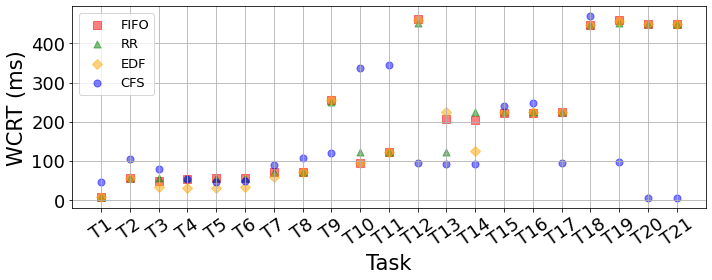

In [20]:
# barchart to show the comparison of WCRT by different schedulers
import matplotlib.pyplot as plt
import os

fontsize = 18
xtick_rotation = 35
save_pdf = False

wcrt_result = results_df[["CFS_wcrt_ms", "FIFO_wcrt_ms", "RR_wcrt_ms", "EDF_wcrt_ms"]]
task_name = ["T" + str(i) for i in range(1, len(wcrt_result)+1)]
wcrt_result["task_name"] = pd.Series(task_name)
task_indices = range(len(wcrt_result))


plt.figure(figsize=(10, 4))

plt.scatter(task_indices, wcrt_result["FIFO_wcrt_ms"], color="red", label="FIFO", marker="s", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["RR_wcrt_ms"], color="green", label="RR", marker="^", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["EDF_wcrt_ms"], color="orange", label="EDF", marker="D", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["CFS_wcrt_ms"], color="blue", label="CFS", marker="o", s=50, alpha=0.5)

plt.xlabel("Task", fontsize=fontsize+3)
plt.ylabel("WCRT (ms)", fontsize=fontsize+3)
plt.xticks(task_indices, wcrt_result["task_name"], rotation=xtick_rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-5)

plt.grid(True)
plt.tight_layout()

if save_pdf:
    filename = 'WCRT_schedulers.pdf'
    if os.path.exists(filename):
        os.remove(filename)
    plt.savefig(filename)
    plt.close()
else:
    plt.show()



/tmp/ipykernel_860294/2448893602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcrt_result["task_name"] = pd.Series(task_name)


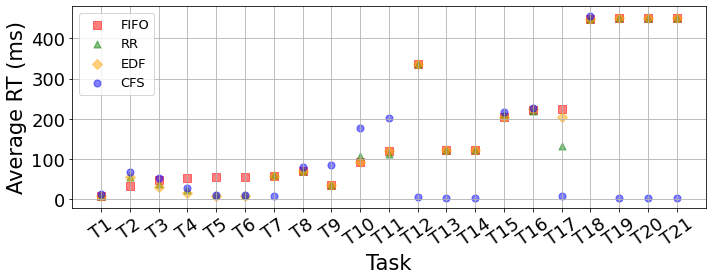

In [21]:
wcrt_result = results_df[["CFS_avg_rt_ms", "FIFO_avg_rt_ms", "RR_avg_rt_ms", "EDF_avg_rt_ms"]]
task_name = ["T" + str(i) for i in range(1, len(wcrt_result)+1)]
wcrt_result["task_name"] = pd.Series(task_name)
task_indices = range(len(wcrt_result))


plt.figure(figsize=(10, 4))
plt.scatter(task_indices, wcrt_result["FIFO_avg_rt_ms"], color="red", label="FIFO", marker="s", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["RR_avg_rt_ms"], color="green", label="RR", marker="^", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["EDF_avg_rt_ms"], color="orange", label="EDF", marker="D", s=50, alpha=0.5)
plt.scatter(task_indices, wcrt_result["CFS_avg_rt_ms"], color="blue", label="CFS", marker="o", s=50, alpha=0.5)

plt.xlabel("Task", fontsize=fontsize+3)
plt.ylabel("Average RT (ms)", fontsize=fontsize+3)
plt.xticks(task_indices, wcrt_result["task_name"], rotation=xtick_rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-5)

plt.grid(True)
plt.tight_layout()

if save_pdf:
    filename = 'AvgRT_schedulers.pdf'
    if os.path.exists(filename):
        os.remove(filename)
    plt.savefig(filename)
    plt.close()
else:
    plt.show()